In [ ]:
#데이터 준비과정
import pandas as pd
import numpy as np

#Warning이 가독성에 방해되서 제거
import warnings
warnings.filterwarnings(action='ignore')

# 데이터 불러오기. y값은 이미 범주형으로 되어있음.
dat_wine=pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/'
                     'wine/wine.data',header=None)
dat_wine.columns = ['class label', 'alchohol', 'malic acid', 'ash', 
                    'alcalinity of ash', 'magnesium', 'total phenols', 
                    'flavanoids', 'nonflavanoid phenols', 
                    'proanthocyanins', 'color intensity', 'hue', 
                    'OD208', 'proline']  # Column names
print('class label:', np.unique(dat_wine['class label']))  # Class 출력

dat_wine.head()

class label: [1 2 3]


,class label,alchohol,malic acid,ash,alcalinity of ash,magnesium,total phenols,flavanoids,nonflavanoid phenols,proanthocyanins,color intensity,hue,OD208,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


<h1>공통 과제</h1>

<h3>SciKit-Learn KernelDensity 사용</h3>

In [ ]:
#사용할 패키지
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity

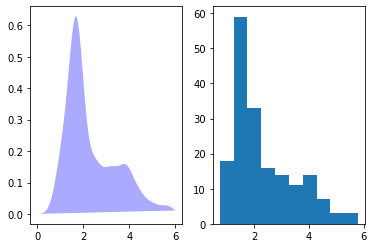

In [ ]:
#Attribute 중 Malic Acid를 선택해서 히스토그램과 Kernel Density Model을 생성
df2 = dat_wine[['class label', 'malic acid']]
X_plot = np.linspace(0, 6, 150)[:, np.newaxis]
fin = dat_wine[['malic acid']]

fig, axs = plt.subplots(1, 2)

kde = KernelDensity(bandwidth=0.25).fit(fin) #Bandwidth 값에 따라서 KD X축 구간의 넓이(?)를 조정 가능
log_dens = kde.score_samples(X_plot)
axs[1].hist(fin)
axs[0].fill(X_plot[:, 0], np.exp(log_dens), fc='#AAAAFF')

plt.show()

<h3>Seaborn 사용</h3>

In [ ]:
import seaborn as sns

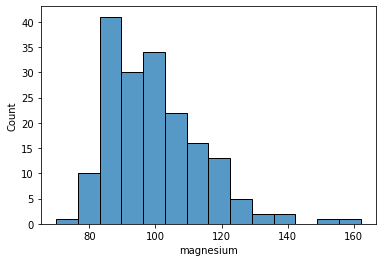

In [ ]:
#히스토그램 생성
mg=sns.histplot(data=dat_wine,x='magnesium')

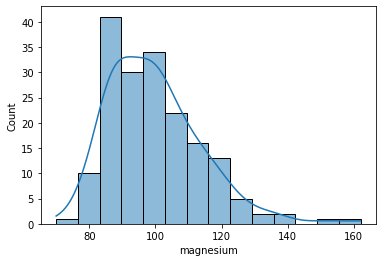

In [ ]:
#Kernel Density Model 생성
mg_kd=sns.histplot(data=dat_wine,x='magnesium',kde=True)

<AxesSubplot:xlabel='magnesium', ylabel='Density'>

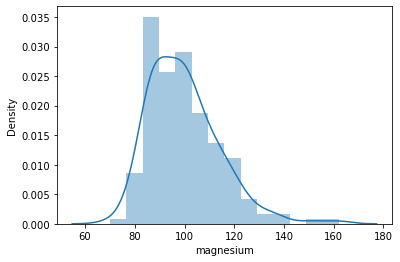

In [ ]:
#displot 함수를 사용할 경우
sns.distplot(a=dat_wine['magnesium'], hist=True,kde=True,rug=False)

<h1>조별 과제</h1>

<h3>K-Nearest Neighbor (KNN) 알고리즘을 사용한 분석</h3>

In [ ]:
#패키지 설치
from sklearn.neighbors import KNeighborsClassifier

#학습모델이 구하고 싶은 target attribute는 class label이므로 target 변수에 저장
target = dat_wine[['class label']]

#각 instance를 표한하는 나머지 attribute들은 attributes라는 변수에 저장
attributes = dat_wine[['alchohol', 'malic acid', 'ash', 
                    'alcalinity of ash', 'magnesium', 'total phenols', 
                    'flavanoids', 'nonflavanoid phenols', 
                    'proanthocyanins', 'color intensity', 'hue', 
                    'OD208', 'proline']]

#먼저 EDA를 통해 특성들을 분석해보면 각 특성별로 스케일의 편차가 큰 편이기 때문에 우리가 만든 KNN 모델에서 다른 특성보다 큰 스케일의
#특성에 대해 preference가 생긱 것이라 판단해서 정규화를 진행

attributes.describe()

,alchohol,malic acid,ash,alcalinity of ash,magnesium,total phenols,flavanoids,nonflavanoid phenols,proanthocyanins,color intensity,hue,OD208,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [ ]:
#정규화 코드
from sklearn.preprocessing import MinMaxScaler #정규화 Tool로는 MinMaxScalar를 사용

scaler = MinMaxScaler()
attributes[:] = scaler.fit_transform(attributes[:])
attributes.describe()

#이제 각 특성들은 0부터 1까지의 값만 가지고 있기 때문에 특정한 특성에 대해 preference가 생기지 않음
#실제로 정규화를 거치지 않고 학습을 할 경우 Overfitting이 발생하여 Validation Set에 대해 예측 점수를 계산하면 1.0 즉 100%가 나옴
#주어진 데이터는 이미 정제된 데이터이기 때문에 이러한 현상이 나타난다고 생각

,alchohol,malic acid,ash,alcalinity of ash,magnesium,total phenols,flavanoids,nonflavanoid phenols,proanthocyanins,color intensity,hue,OD208,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,0.518584,0.315484,0.538244,0.458502,0.323278,0.453487,0.356386,0.437460,0.372523,0.322363,0.388170,0.491460,0.334446
std,0.213639,0.220780,0.146708,0.172142,0.155244,0.215811,0.210730,0.234818,0.180555,0.197806,0.185831,0.260070,0.224613
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.350658,0.170455,0.454545,0.340206,0.195652,0.262931,0.182489,0.264151,0.264984,0.165529,0.245935,0.244505,0.158702
50%,0.531579,0.222332,0.534759,0.458763,0.304348,0.474138,0.378692,0.396226,0.361199,0.290956,0.394309,0.553114,0.282097
75%,0.696711,0.462945,0.640374,0.561856,0.402174,0.627586,0.534810,0.580189,0.485804,0.419795,0.520325,0.695971,0.504280
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#Training Set과 Validation Set으로 나눠주는 과정
from sklearn.model_selection import train_test_split

training_data, validation_data , training_labels, validation_labels = train_test_split(attributes, target, random_state = 100)

print(len(training_data))
print(len(validation_data))
print(len(training_labels))
print(len(validation_labels))

133
45
133
45


In [ ]:
#KNN 모델 생성
knn = KNeighborsClassifier(n_neighbors = 3, weights='uniform', p=2)
    #n_neightbors = k 값 (몇개의 neighbor를 참조하는 지)
    #weights = uniform이면 모든 instance에 대해 같은 가중치를 부여, distance면 더 가까운 instance에 대해 더 높은 가중치를 부여
    #p=1: manhatten_distance, p=2: euclidean_distance, p=l_p:minkowski_distance
    #파라미터들을 생략해줘도 문제없지만 default값으로 설정됨

knn.fit(training_data, training_labels) #fit = 모델을 학습시키는 함수

print(knn.score(validation_data, validation_labels)) #모델의 정확도 평가를 위해 validation set을 사용할 수 있음

0.9333333333333333


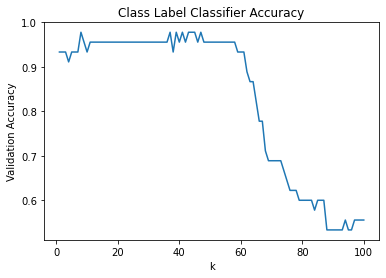

In [ ]:
#k에 다양한 값을 대입하는 경우 (weights = uniform)
import matplotlib.pyplot as plt

k_list = range(1,101)
accuracies = []

for k in k_list:
  knn = KNeighborsClassifier(n_neighbors = k)
  knn.fit(training_data, training_labels)
  accuracies.append(knn.score(validation_data, validation_labels))

plt.plot(k_list, accuracies)
plt.xlabel("k")
plt.ylabel("Validation Accuracy")
plt.title("Class Label Classifier Accuracy")
plt.show()

# K가 매우 작을 경우: 데이터의 지역적 특성을 지나치게 반영(overfitting)
# K가 매우 클 경우: 다른 범주의 개체를 너무 많이 포함하여 오분류할 위험이 높음(underfitting)

In [ ]:
#제일 높은 점수(최적)의 hyperparameter k값 구하기
from sklearn.model_selection import cross_val_score

best_k = [k_list[i] for i in range (len(accuracies)) if accuracies[i]==np.max(accuracies)]
print('optimized k value :',best_k)
print('Highest accuracy:', accuracies[best_k[0]])

optimized k value : [8, 37, 39, 41, 43, 44, 45, 47]
Highest accuracy: 0.9555555555555556


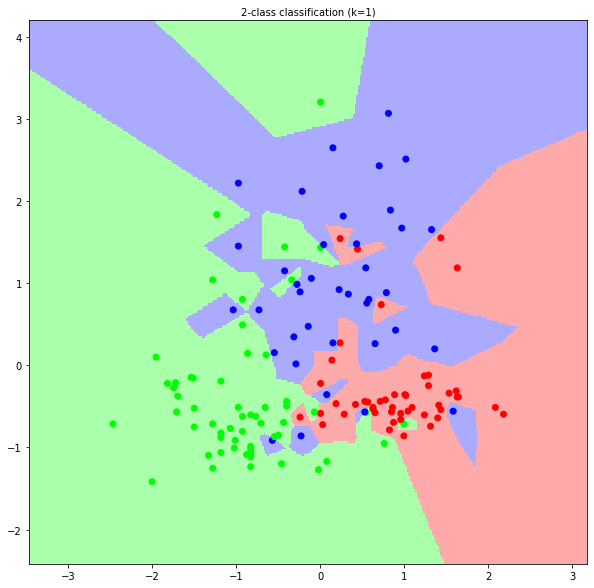

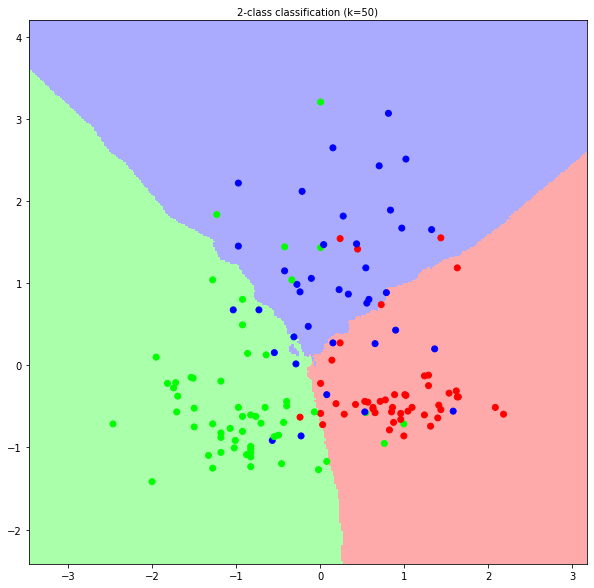

In [ ]:
from sklearn.preprocessing import StandardScaler
import matplotlib
from matplotlib.colors import ListedColormap

wine_data=pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/'
                     'wine/wine.data',header=None)
wine_data.columns=['class_label', 'alchohol', 'malic_acid', 'ash', 
                    'alcalinity_of_ash', 'magnesium', 'total_phenols', 
                    'flavanoids', 'nonflavanoid_phenols', 
                    'proanthocyanins', 'color_intensity', 'hue', 
                    'OD280', 'proline']

x_train, x_test, y_train, y_test = train_test_split(X,Y,stratify=Y,test_size=0.20,random_state=2021)

normalizer = StandardScaler()
x_train=normalizer.fit_transform(x_train)
x_test= normalizer.transform(x_test)

x_vis = x_train[:,:2]#시각화 편의성을 위해 임의로 2개의 특성만을 이용
y_vis = y_train.values.ravel()

h=.02

cmap_light = ListedColormap(['#FFAAAA','#AAFFAA','#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000','#00FF00','#0000FF'])

for k in [1,50]:
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(x_vis, y_vis)
    
    x_min, x_max= x_vis[:,0].min()-1, x_vis[:,0].max()+1
    y_min, y_max= x_vis[:,1].min()-1, x_vis[:,1].max()+1
    xx, yy = np.meshgrid(np.arange(x_min,x_max,h),
                        np.arange(y_min, y_max,h))
    Z=clf.predict(np.c_[xx.ravel(), yy.ravel()])
    
    Z= Z.reshape(xx.shape)
    plt.figure(figsize=(10,10))
    plt.pcolormesh(xx,yy,Z,cmap=cmap_light)
    
    plt.scatter(x_vis[:,0],x_vis[:,1],c=y_vis,cmap=cmap_bold)
    plt.xlim(xx.min(),xx.max())
    plt.ylim(yy.min(),yy.max())
    plt.title(f"2-class classification (k={k})",fontsize=10)
    
plt.show()

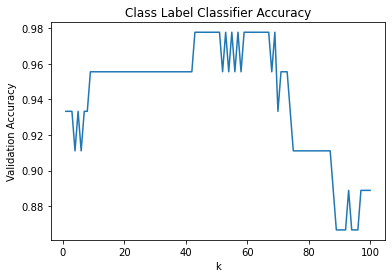

In [ ]:
#weights를 distance로 설정할 경우
import matplotlib.pyplot as plt

k_list = range(1,101)
accuracies = []

for k in k_list:
  knn = KNeighborsClassifier(n_neighbors = k, weights = 'distance')
  knn.fit(training_data, training_labels)
  accuracies.append(knn.score(validation_data, validation_labels))

plt.plot(k_list, accuracies)
plt.xlabel("k")
plt.ylabel("Validation Accuracy")
plt.title("Class Label Classifier Accuracy")
plt.show()

#weights 파라미터가 distance일 경우에도 k가 커질수록 underfitting이 생겨 성능이 떨어지는 경향은 여전히 있지만 하락폭은 비교적 적었다
#또한 k가 40과 70사이일 때 성능이 더 좋아지는 모습을 관찰할 수 있었고, 각 모델이 hyperparamter k값을 사용한다는 가정하에 weights=distance
#인 모델의 점수가 더 높다

In [ ]:
best_k = [k_list[i] for i in range (len(accuracies)) if accuracies[i]==np.max(accuracies)]
print('Optimized k value :',best_k)
print('Highest accuracy:', accuracies[best_k[0]])

Optimized k value : [43, 44, 45, 46, 47, 48, 49, 50, 51, 53, 55, 57, 59, 60, 61, 62, 63, 64, 65, 66, 67, 69]
Highest accuracy: 0.9777777777777777


<span style="font-style: italic; color: grey">조원: 김수경 남이량 임혜리 임형우</span>